# Implement a simple single/Multi-layer perceptron from scratch in Python to solve a basic binary classification problem (e.g., XOR gate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 10000

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training
for epoch in range(epochs):
    # Forward pass
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)

    # Backpropagation
    d_a2 = (a2 - y)
    d_z2 = d_a2 * sigmoid_deriv(z2)
    d_W2 = a1.T.dot(d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = d_z2.dot(W2.T)
    d_z1 = d_a1 * sigmoid_deriv(z1)
    d_W1 = X.T.dot(d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Gradient descent
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.3267
Epoch 1000, Loss: 0.2186
Epoch 2000, Loss: 0.1529
Epoch 3000, Loss: 0.0425
Epoch 4000, Loss: 0.0144
Epoch 5000, Loss: 0.0077
Epoch 6000, Loss: 0.0051
Epoch 7000, Loss: 0.0037
Epoch 8000, Loss: 0.0029
Epoch 9000, Loss: 0.0024


In [6]:
def predict(x):
    a1 = sigmoid(x.dot(W1) + b1)
    a2 = sigmoid(a1.dot(W2) + b2)
    return (a2 > 0.5).astype(int)

In [7]:
# Test cases to evaluate predictions
test_cases = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

predictions = predict(test_cases)

print("\nTest Case Results:")
for i, test in enumerate(test_cases):
    print(f"Input: {test} → Predicted: {predictions[i][0]} | Expected: {y[i][0]}")



Test Case Results:
Input: [0 0] → Predicted: 0 | Expected: 0
Input: [0 1] → Predicted: 1 | Expected: 1
Input: [1 0] → Predicted: 1 | Expected: 1
Input: [1 1] → Predicted: 0 | Expected: 0


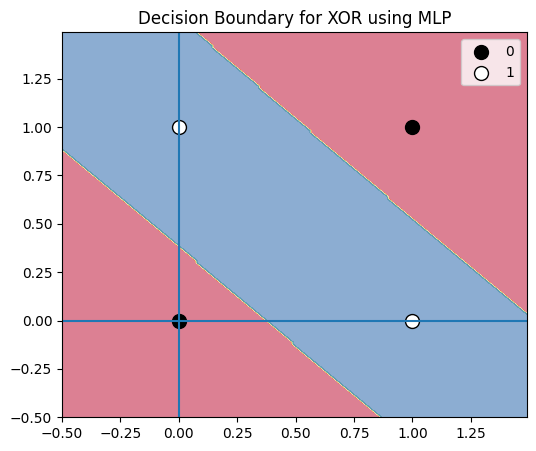

In [17]:
# Plot decision boundary
h = 0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)

# Plot points with class-specific labels for the legend
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], c='black', edgecolors='k',s=100, label='0' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], c='white', edgecolors='k', s=100, label='1' if i == 1 else "")
plt.axhline()
plt.axvline()
plt.title("Decision Boundary for XOR using MLP")
plt.legend()
plt.show()
